# Finding The 'Ideal' Global 500 Company
Authors: Max Stopyra and Daniel Park

April 9, 2021

### Abstract:

### Our research question: 
*What are the most represented characteristics of the top grossing businesses around the world?*

### Methodology:
We collected our data from a table on the Wikipedia page, [List of Largest Companies by Revenue](https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue) which includes a ranked list of the highest grossing companies around the world, the industry of each company,  their revenues from the 2020 fiscal year, their profit from the 2020 fiscal year, the number of employees working for each company, and the location of their headquarters by country.

To answer our question, we wanted to find out three things: 

1. What are the most common industries among these companies?
2. What type of ownership is most common amongst these companies? 
3. What country houses the most company headquarters from this sample?

Discovering the commonalities of these corporate features would lead us to finding the characteristicts most representative of the top grossing companies.

#### How did we find this information?

We created the function, get_fortune_table() which used [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape our desired data from the table mentioned above. This function requires  the url to the wikipedia page and the name of the tag associated with the desired table within the page as inputs in the form of strings, accesses the url with [Requests](https://docs.python-requests.org/en/master/), pulls in the page data using Beautiful Soup and then returns the HTML data of the desired table.

We then created the function, table_to_dataframe() which read the scraped table and put it into a [Pandas](https://pandas.pydata.org/docs/) data frame. The function does this by taking HTML data for a table as an input, turning it into a string, reading it using Pandas, and returning all of the data presented in the table as a data frame of all the company information.

To clean the data up a little, we passed the data frame through our function, clean_dataframe(). This function cleaned our data up by taking our data frame as an input, deleting the 'Ref' column, removing the column detailing individual company profit (both unnecessary for analysis) and returning the cleaned data frame.

For ease of storage, use between two people, and the purpose of having 'tangible' data we then created a function, dataframe_to_csv() which converted this data into a csv file (function takes dataframe and string representing the desired name of the csv file as inputs to do this).


In [10]:
## Get all the functions from 'wikipedia_scrape.py'
from wikipedia_scrape import get_fortune_table, get_company_links, table_to_dataframe, clean_dataframe, get_company_types, dictionary_to_dataframe, dataframe_to_csv
import pandas as pd

## Scrape the data from the Global Fortune 500 Top 50 Companies data into a table
fortune_table = get_fortune_table("https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue","wikitable sortable")

## Print to show what our data looks like
print(pd.read_csv("company_total.csv"))


    Rank                                   Name                Industry  \
0      1                                Walmart                  Retail   
1      2                          Sinopec Group             Oil and gas   
2      3                                 Amazon                  Retail   
3      4                             State Grid             Electricity   
4      5               China National Petroleum             Oil and gas   
5      6                      Royal Dutch Shell             Oil and gas   
6      7                           Saudi Aramco             Oil and gas   
7      8                             Volkswagen              Automotive   
8      9                                     BP             Oil and gas   
9     10                                 Toyota              Automotive   
10    11                                  Apple             Electronics   
11    12                             ExxonMobil             Oil and gas   
12    13                 

We had the various industries and location of the headquarters, however we still needed to obtain the ownership types of each company. In order to do this we created a function get_company_links() which retreived the links corresponding to the wikipedia page for each company in the initial table. This function requires the html data of the table with the links in it as an input, searches the table row by row within the column designated to the company names and links, and adds the name of the company and its link to a dictionary key and value respectively (this dictionary is then returned).

To find out what type of ownership each company fell under, we created the function, get_company_types() which used get_fortune_table() on each link within the dictionary to scrape the page for each company and find what type of ownership each of them were under. In order to function (no pun intended) correctly, the function requires the dictionary of company names and links as an input. The function then iterates this list, scrapes the pages designated to all of the links, finds the type of each company, and returns a dictionary of company names and their types.

We then took this dictionary and used it as an input for our function, dictionary_to_dataframe() which converted our dictionary of companies and their types into a dataframe and returned it (We store this data as a csv as well).

In [2]:
print(dictionary_to_dataframe(get_company_types(get_company_links(fortune_table))), 'company_type')

                             Company Name                    Company Type
0                                 Walmart                          Public
1                           Sinopec Group          State-owned enterprise
2                                  Amazon                          Public
3                              State Grid          State-owned enterprise
4                China National Petroleum          State-owned enterprise
5                       Royal Dutch Shell          Public limited company
6                            Saudi Aramco          State-owned enterprise
7                              Volkswagen                          Public
8                                      BP          Public limited company
9                                  Toyota                       Public KK
10                                  Apple                          Public
11                             ExxonMobil                          Public
12                             CVS Hea

Upon retreiving and cleaning this data, we then used [matplotlib](https://matplotlib.org/) and [plotly](https://plotly.com/python/) to plot all 3 sought after corporate characteristics with respect to the occurances of each sub-category under each characteristic in 3 seperate visuals:

1. We created a pie chart depicting the ownership types of the 50 companies by counting the occurences of each ownership type in our dataset and plotting these values in respect to ownership type to see what ownership type was most common amongst the companies.

2. We created a radar plot revealing the industries that make up the list of companies by counting the occurences of each industry in our dataset and plotting these numbers in respect to the different industries to see what industries the most companies were tied to.

3. We created an interactive choropleth that told us how many of companies headquarters are located in every country in the world, as well as which location housed the most company Headquarters from the list.


### Our Results: 

Text(0.5, 1.0, 'Ownership Types of the Top 50 Largest Companies')

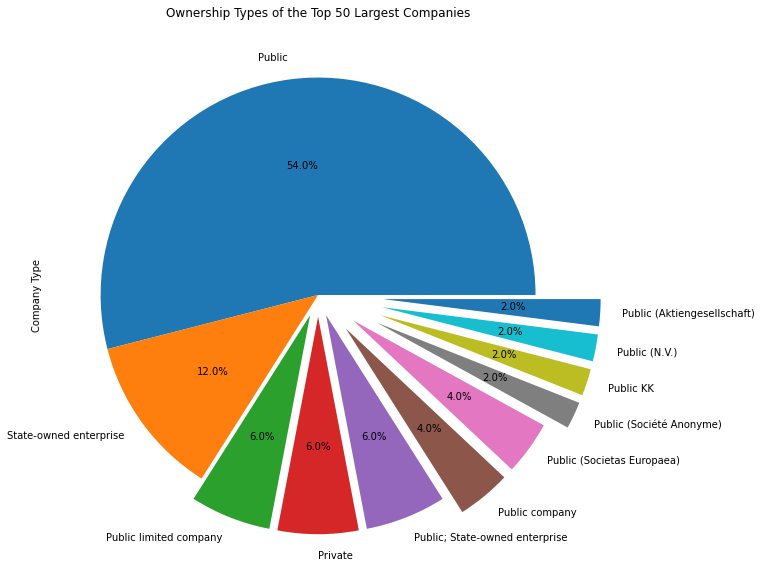

In [3]:
from matplotlib import pyplot as plt
from math import pi

company_type = pd.read_csv("company_type.csv")
type_occurences = company_type["Company Type"].value_counts()
explode = (0, 0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3)
type_occurences.plot.pie(y='Company Type', figsize=(10, 10),autopct='%1.1f%%', explode = explode)

plt.title("Ownership Types of the Top 50 Largest Companies")

As shown in the pie chart above, our data tells us that the most common type of company within our sample of the largest companies by revenue is, by far, a publically owned (by the standard of United States' jurisdiction) company. Over half of the companies fell into this category. 

It's also worth mentioning that our dataset and visuals account for different types of public companies based on location and the laws surrounding joint-stock companies in each location ('Public (Societas Europaea)', etc.). 

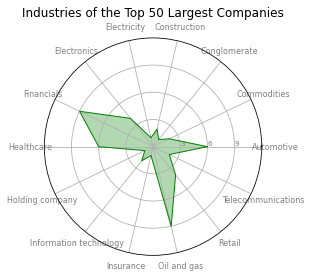

In [4]:
company_total = pd.read_csv("company_total.csv")
industries_occurence = company_total.groupby("Industry").count()["Rank"]
industries = industries_occurence.index
num_angles = len(industries)
occurences = industries_occurence.append(pd.Series(industries_occurence[0]))
angles = [n / float(num_angles) * 2 * pi for n in range(num_angles)]
angles += angles[:1]
 
axes = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], industries, color='grey', size=8)
 
axes.set_rlabel_position(0)
plt.yticks([3,6,9], ["3","6","9"], color="grey", size=7)
plt.ylim(0,12)

axes.plot(angles, occurences, 'g', linewidth=1, linestyle='solid')

axes.fill(angles, occurences, 'g', alpha=0.3)

plt.title('Industries of the Top 50 Largest Companies')

plt.show()

This radar plot indicates that most of the companies in our dataset are in either the Financials industry or the Oil and Gas industry.

In [8]:
import plotly.express as px
from iso_code_dict_m import cc3_cn

company_total = pd.read_csv("company_total.csv")
origin_occurences = pd.DataFrame(company_total.groupby("Country").count()["Employees"])

origin_occurences = origin_occurences.rename(columns = {"Employees":"Number of Fortune 500 HQs"})
list_origins = origin_occurences.index.tolist()

list_iso_codes = []
for country in list_origins:
    list_iso_codes.append(cc3_cn[country])

origin_occurences["ISO Code"] = list_iso_codes

fig = px.choropleth(origin_occurences, locations="ISO Code",
                    color="Number of Fortune 500 HQs", 
                    hover_name=origin_occurences.index, 
                    color_continuous_scale=px.colors.sequential.Teal, title = "Headquarters Locations of the Top 50 Largest Companies")
fig.show()

KeyError: 'Country'

As shown in this interactive choropleth, our data indicated that the most common location of Headquarters for the companies in our dataset was the United States of America. Go ahead and hover over the shaded countries to see the name of the country, its 3 digit ISO code, and the number of company Headquarters from our dataset located there.


### Interpretation: 
Based on industry, ownership type, and location of headquarters, our data indicated that the most representative combination of corporate characteristics of a top global company is:
* A Publicly traded (by U.S. standards)
* Oil and gas or Financials company
* With its headquarters stationed in the United States.

We approached the term 'representative' from the angle of finding which categories were the most seen/common amongst our sample set of data, and we decided not to weigh in the rank and size of each company when figuring out what representative meant. We did this because, the number of employees seemed to vary by industry, therefore weighing a company's significance in the list by the size would skew our results toward companies in the industries with the most employees. And we didn't weigh in ranks when thinking of the most representative features because we wanted to obtain a general combination of characteristics for the complete dataset, and not something skewed toward the top portion of the dataset (higher ranked companies).

Having said these things, we do not beleive that this combination of corporate characteristics will get any company that falls into these categories a spot on the Global 500 List. These qualities do not represent the fundamental values necessary to have a successful company, however our choice of these characteristics and our analysis provide a starting point for anyone looking to figure out their shot at breaking into the Global 500.

#### Learning Experiences and Next Steps: 
At the start, we had a lot of difficulties cleaning our data for use and analysis. The dataset we analyze in this essay was not the first that we scraped and parsed through. We learned a lot about the wonders of Beautiful Soup, Pandas, and Requests with each dataset we scraped and obtained. We also learned that having a backup plan saves a lot of time, and that knowing when to pivot when something is out of scope is an extremely valuable skill.

A potential next step that could be taken with this could be a forsight that we didn't address in this project, which was figuring out what corporate characteristics are beneficial for a corporation that is trying to become the largest company in the world. This could be done by factoring in the rank of the company when identifying the ideal. 

we would put more emphasis on the top companies by assigning companies with higher revenue margins a higher value to make characteristics of companies like Walmart and Amazon more important than those companies on the bottom of the top 50 list 
